In [1]:
import numpy as np
import tensorflow as tf 
import sys
import os

import dotenv
import os
from dotenv import load_dotenv, find_dotenv
#load_dotenv(find_dotenv())
sys.path.append(os.getenv('static_dir'))


In [2]:

from src.models.model_arcitectures._model_quantile_simp import quantile_model
from src.models.model_arcitectures._model_quantule_v2 import quantile_model as qmodel_v2
from src.models.model import Model
from src.models._util import seed_everything
from src.analyse_model.analyse import Analyse_model
from src.analyse_model.visualize import *

In [3]:
seed_everything(42)
initi()

# Loading Data

In [4]:
dataset = np.load('../data/processed/train_test_ratiocleaned_szcore_minmax.npz',allow_pickle=True)
scale = [dataset['minimum_values'],
                     dataset['metadata_training_minimum_values'],
                     dataset['minimum_values_targets'],
                     dataset['maximum_values'],
                     dataset['metadata_training_maximum_values'],
                     dataset['maximum_values_targets'],
                    
                    dataset['img_mean'],
                     dataset['metadata_mean'],
                     dataset['targets_mean'],
                     dataset['img_std'],
                     dataset['metadata_std'],
                     dataset['targets_std']]

# Loading Model

In [5]:
with Model() as M:
    M.data_load(dataset["imgs_training_clipped_scaled"],dataset["metadata_training_scaled"],dataset["targets_training_scaled"])
    M.model_load(which_model='quantile_model_v2')
    M.model.model.load_weights('../models/quantile_v2/weights_lowest_loss_quantile_v2.h5')

1Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

 Physical GPUs, 1 Logical GPUs


2022-09-26 20:22:35.408557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-26 20:22:35.408719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Analysing results

In [6]:
with Analyse_model(M.model.model) as anal:
    anal.get_data(
        [
            dataset["imgs_training_clipped_scaled"],
            dataset["metadata_training_scaled"],
            dataset["targets_training_scaled"],
        ]
    )
    anal.get_scaling(scale)
    anal.inverse_values()
    anal.all_estimates_inverse()


2022-09-26 20:22:36.668616: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-26 20:22:36.733706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 13s 52ms/step


In [7]:
anal.accuracy()
anal.confidence_intervals()

In [8]:
ci_index = np.argsort(anal.length_99CI)

True length: 250     
Estimated length:-201 [8173,-559]            
True width: 43             
Estimated width:-49 [-172,-89]


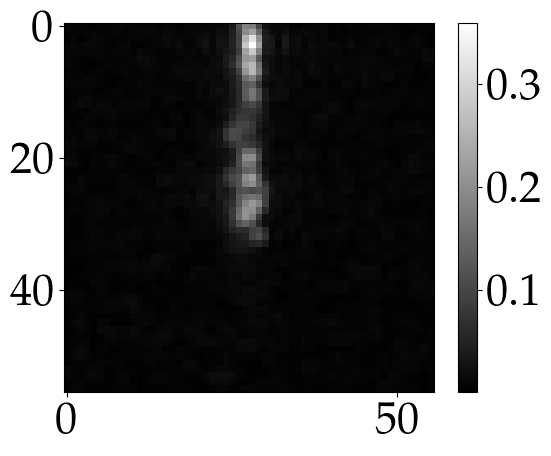

In [9]:
ix = ci_index[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 338     
Estimated length:2195 [-377,-135]            
True width: 59             
Estimated width:-9 [-29,-19]


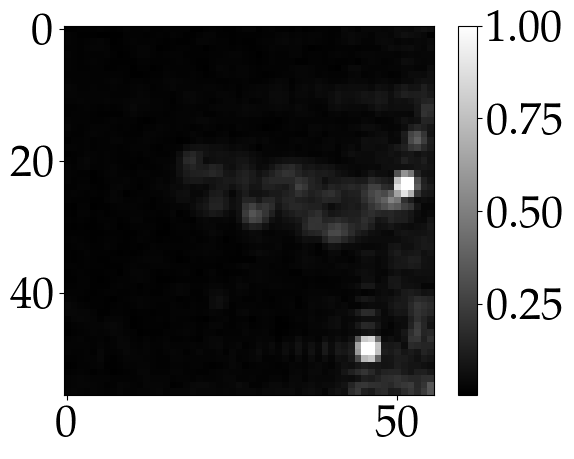

In [10]:
ix = ci_index[-2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 209     
Estimated length:18 [21,323]            
True width: 31             
Estimated width:-24 [-33,-31]


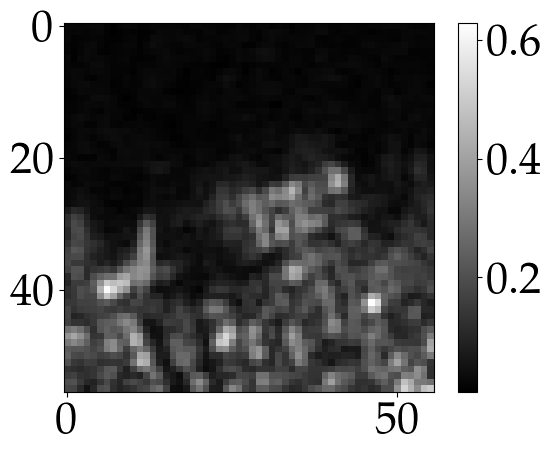

In [11]:
ix = ci_index[-1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 94     
Estimated length:340 [190,430]            
True width: 16             
Estimated width:14 [22,28]


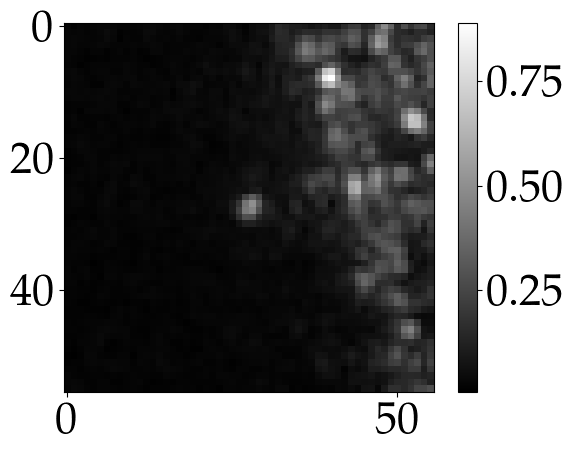

In [12]:
ix = ci_index[-3]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 238     
Estimated length:259 [201,435]            
True width: 31             
Estimated width:-13 [-26,-23]


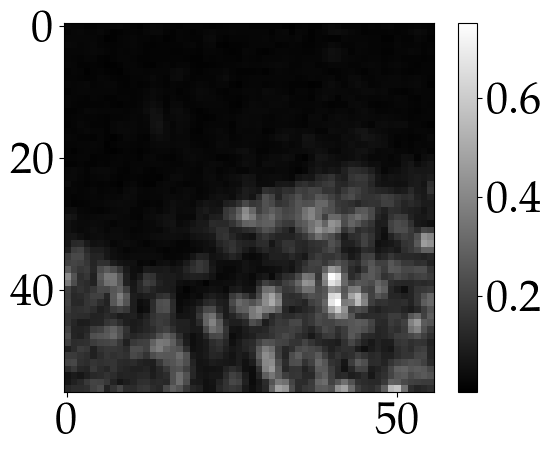

In [13]:
ix = ci_index[-4]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 182     
Estimated length:-256 [7154,-549]            
True width: 31             
Estimated width:-141 [-344,-239]


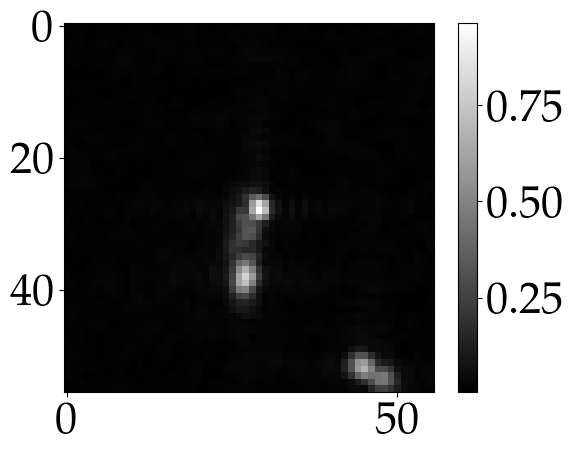

In [14]:
ix = ci_index[4]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 182     
Estimated length:-332 [6300,-603]            
True width: 31             
Estimated width:-118 [-320,-196]


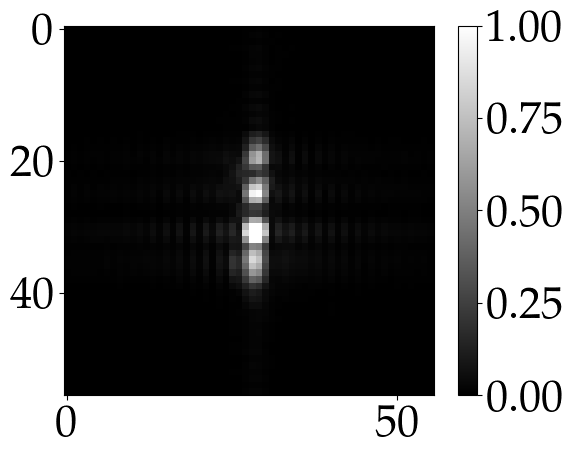

In [15]:
ix = ci_index[8]
single_ship_co(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 182     
Estimated length:-332 [6300,-603]            
True width: 31             
Estimated width:-118 [-320,-196]


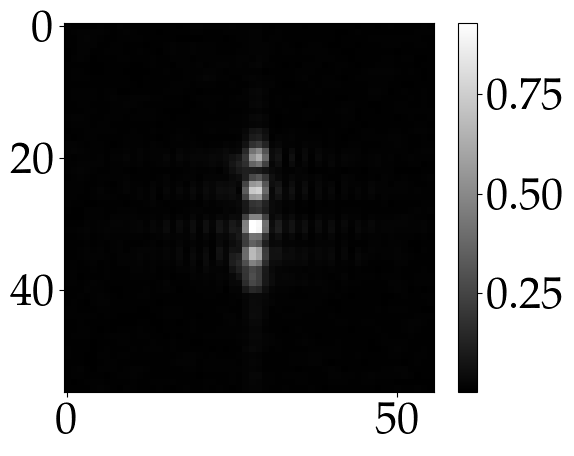

In [16]:
ix = ci_index[8]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [17]:
unique, counts = np.unique(anal.mmsi, return_counts=True)
mmsi_index = np.argsort(counts)


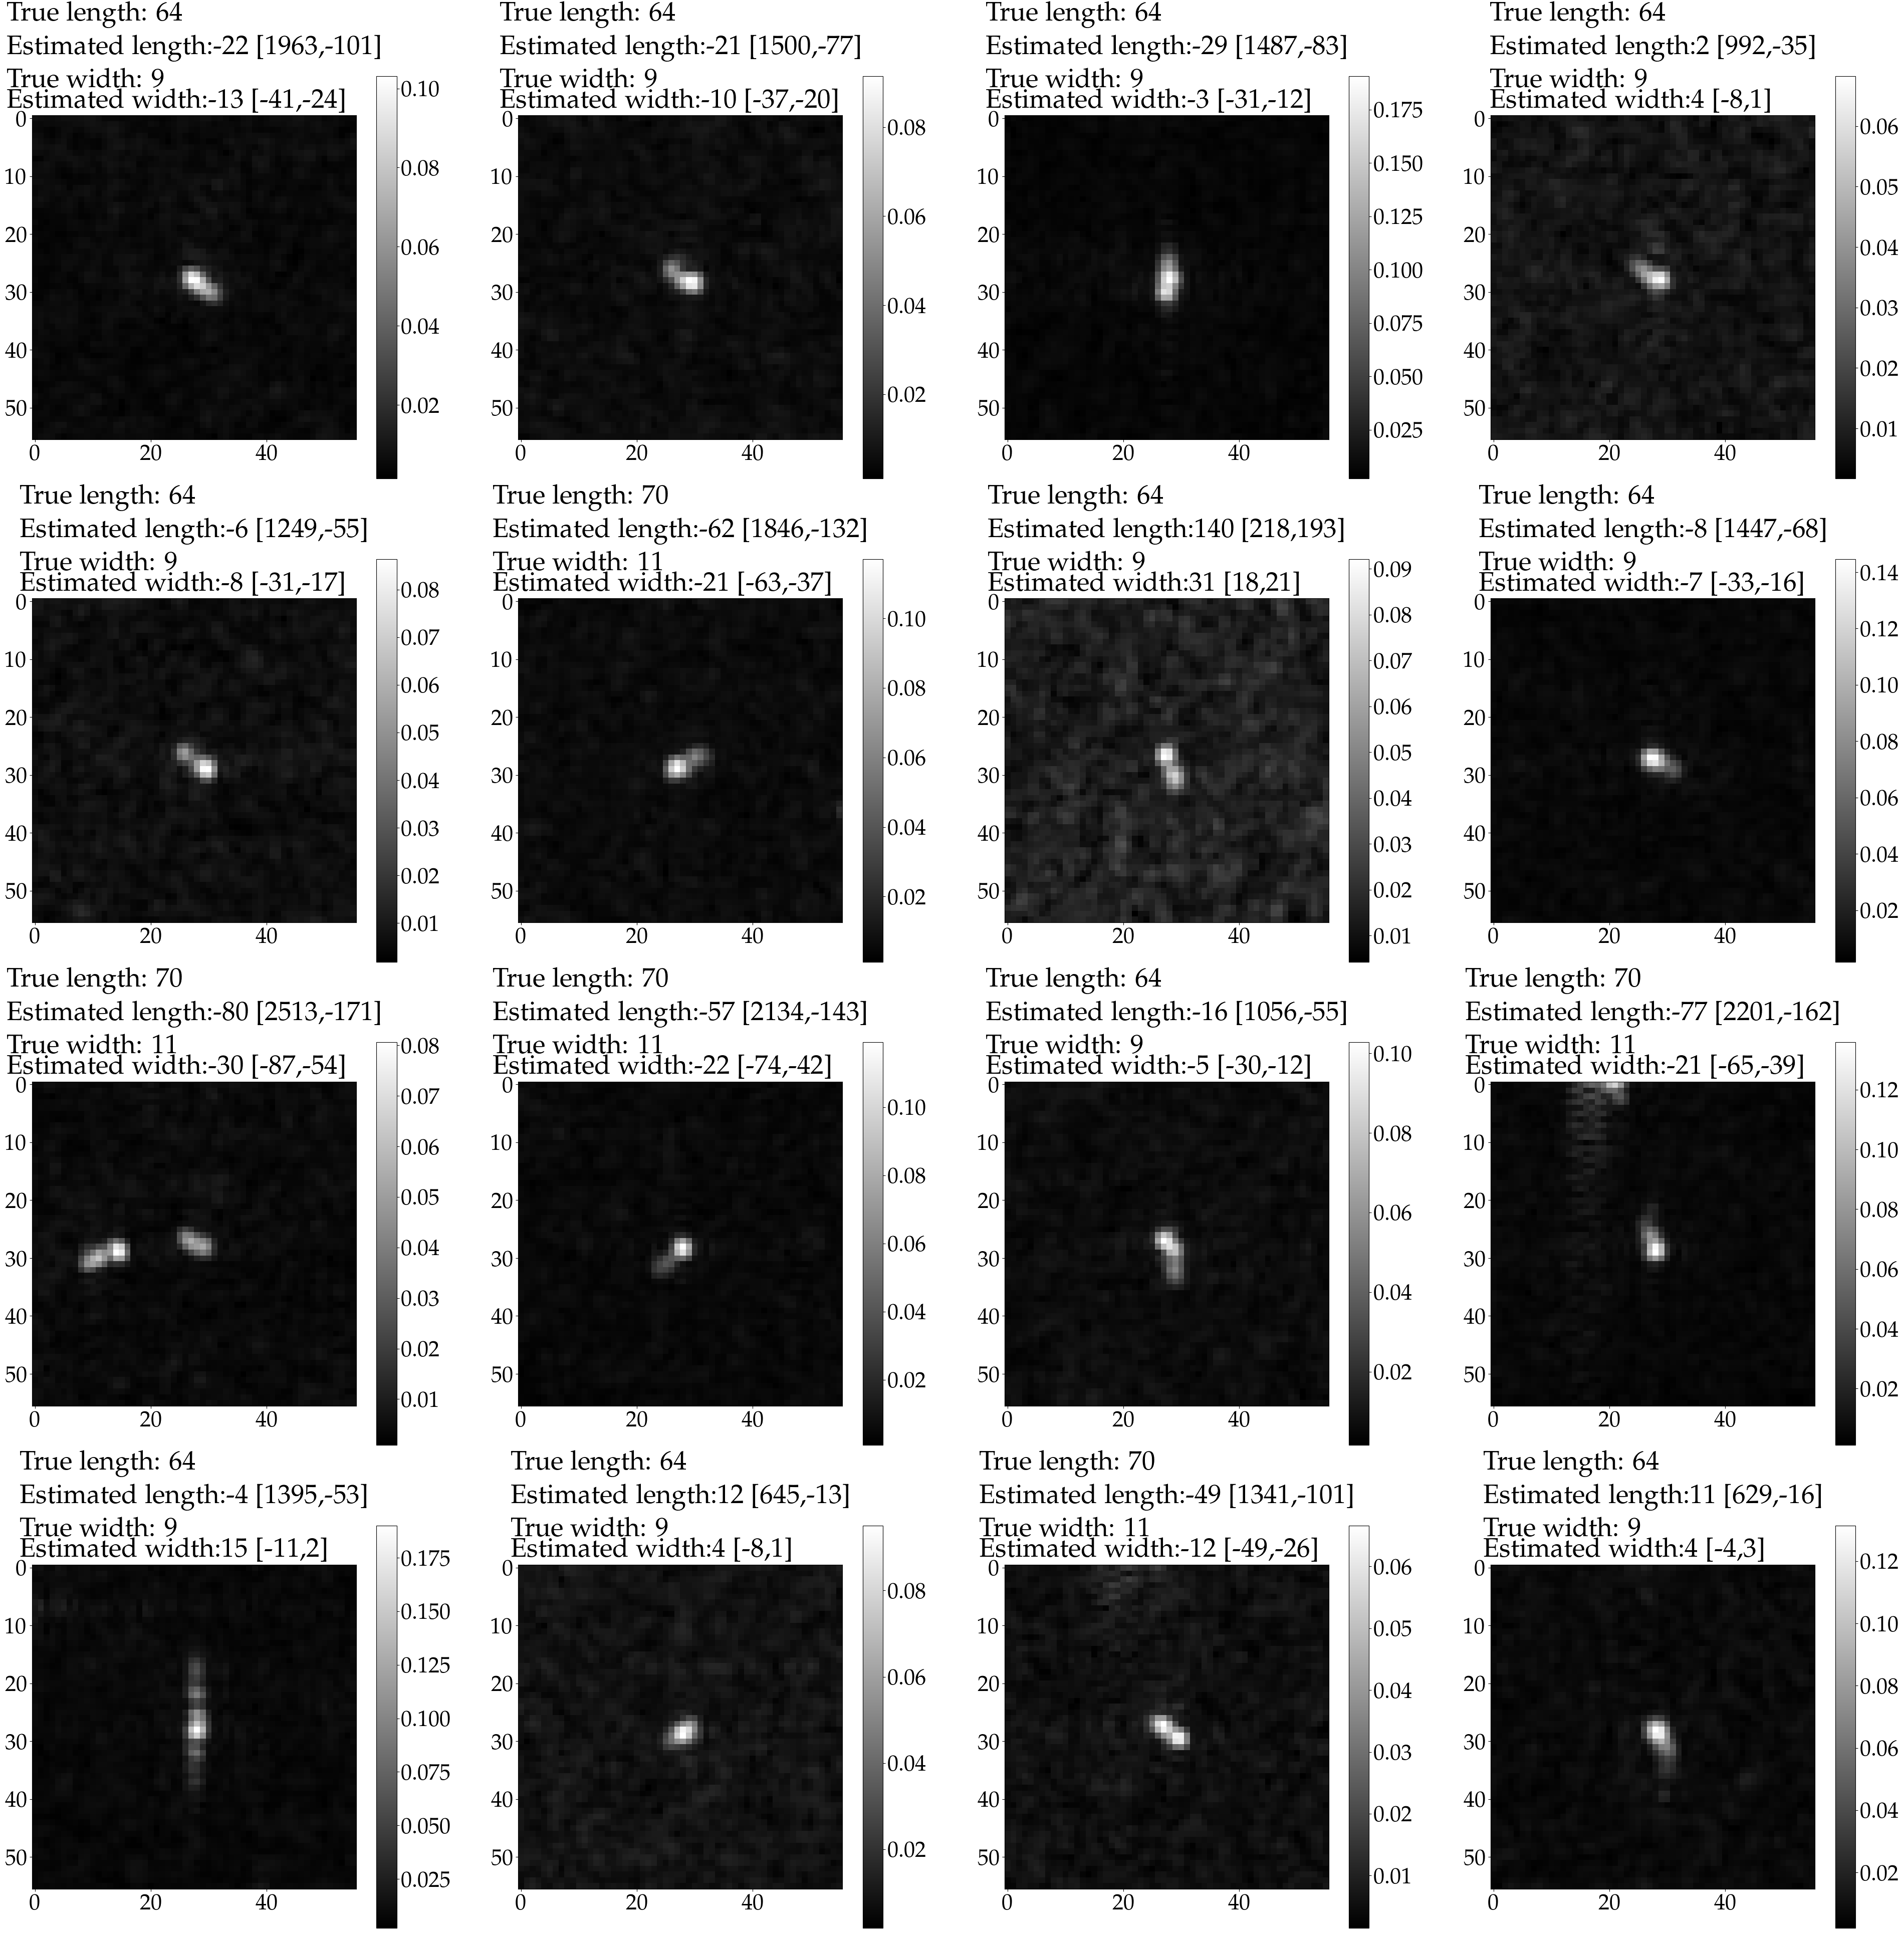

In [18]:
idx_same_ship = np.where(anal.mmsi==unique[mmsi_index[-10]])[0]

k = 1
plt.figure(figsize=(48,48))
for _ in range(16):
    plt.subplot(4,4,k)
    ix = idx_same_ship[k]
    plt.imshow(anal.images[ix,:, :, 0], cmap='gray')
    plt.colorbar()
    plt.title(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

    k = k+1


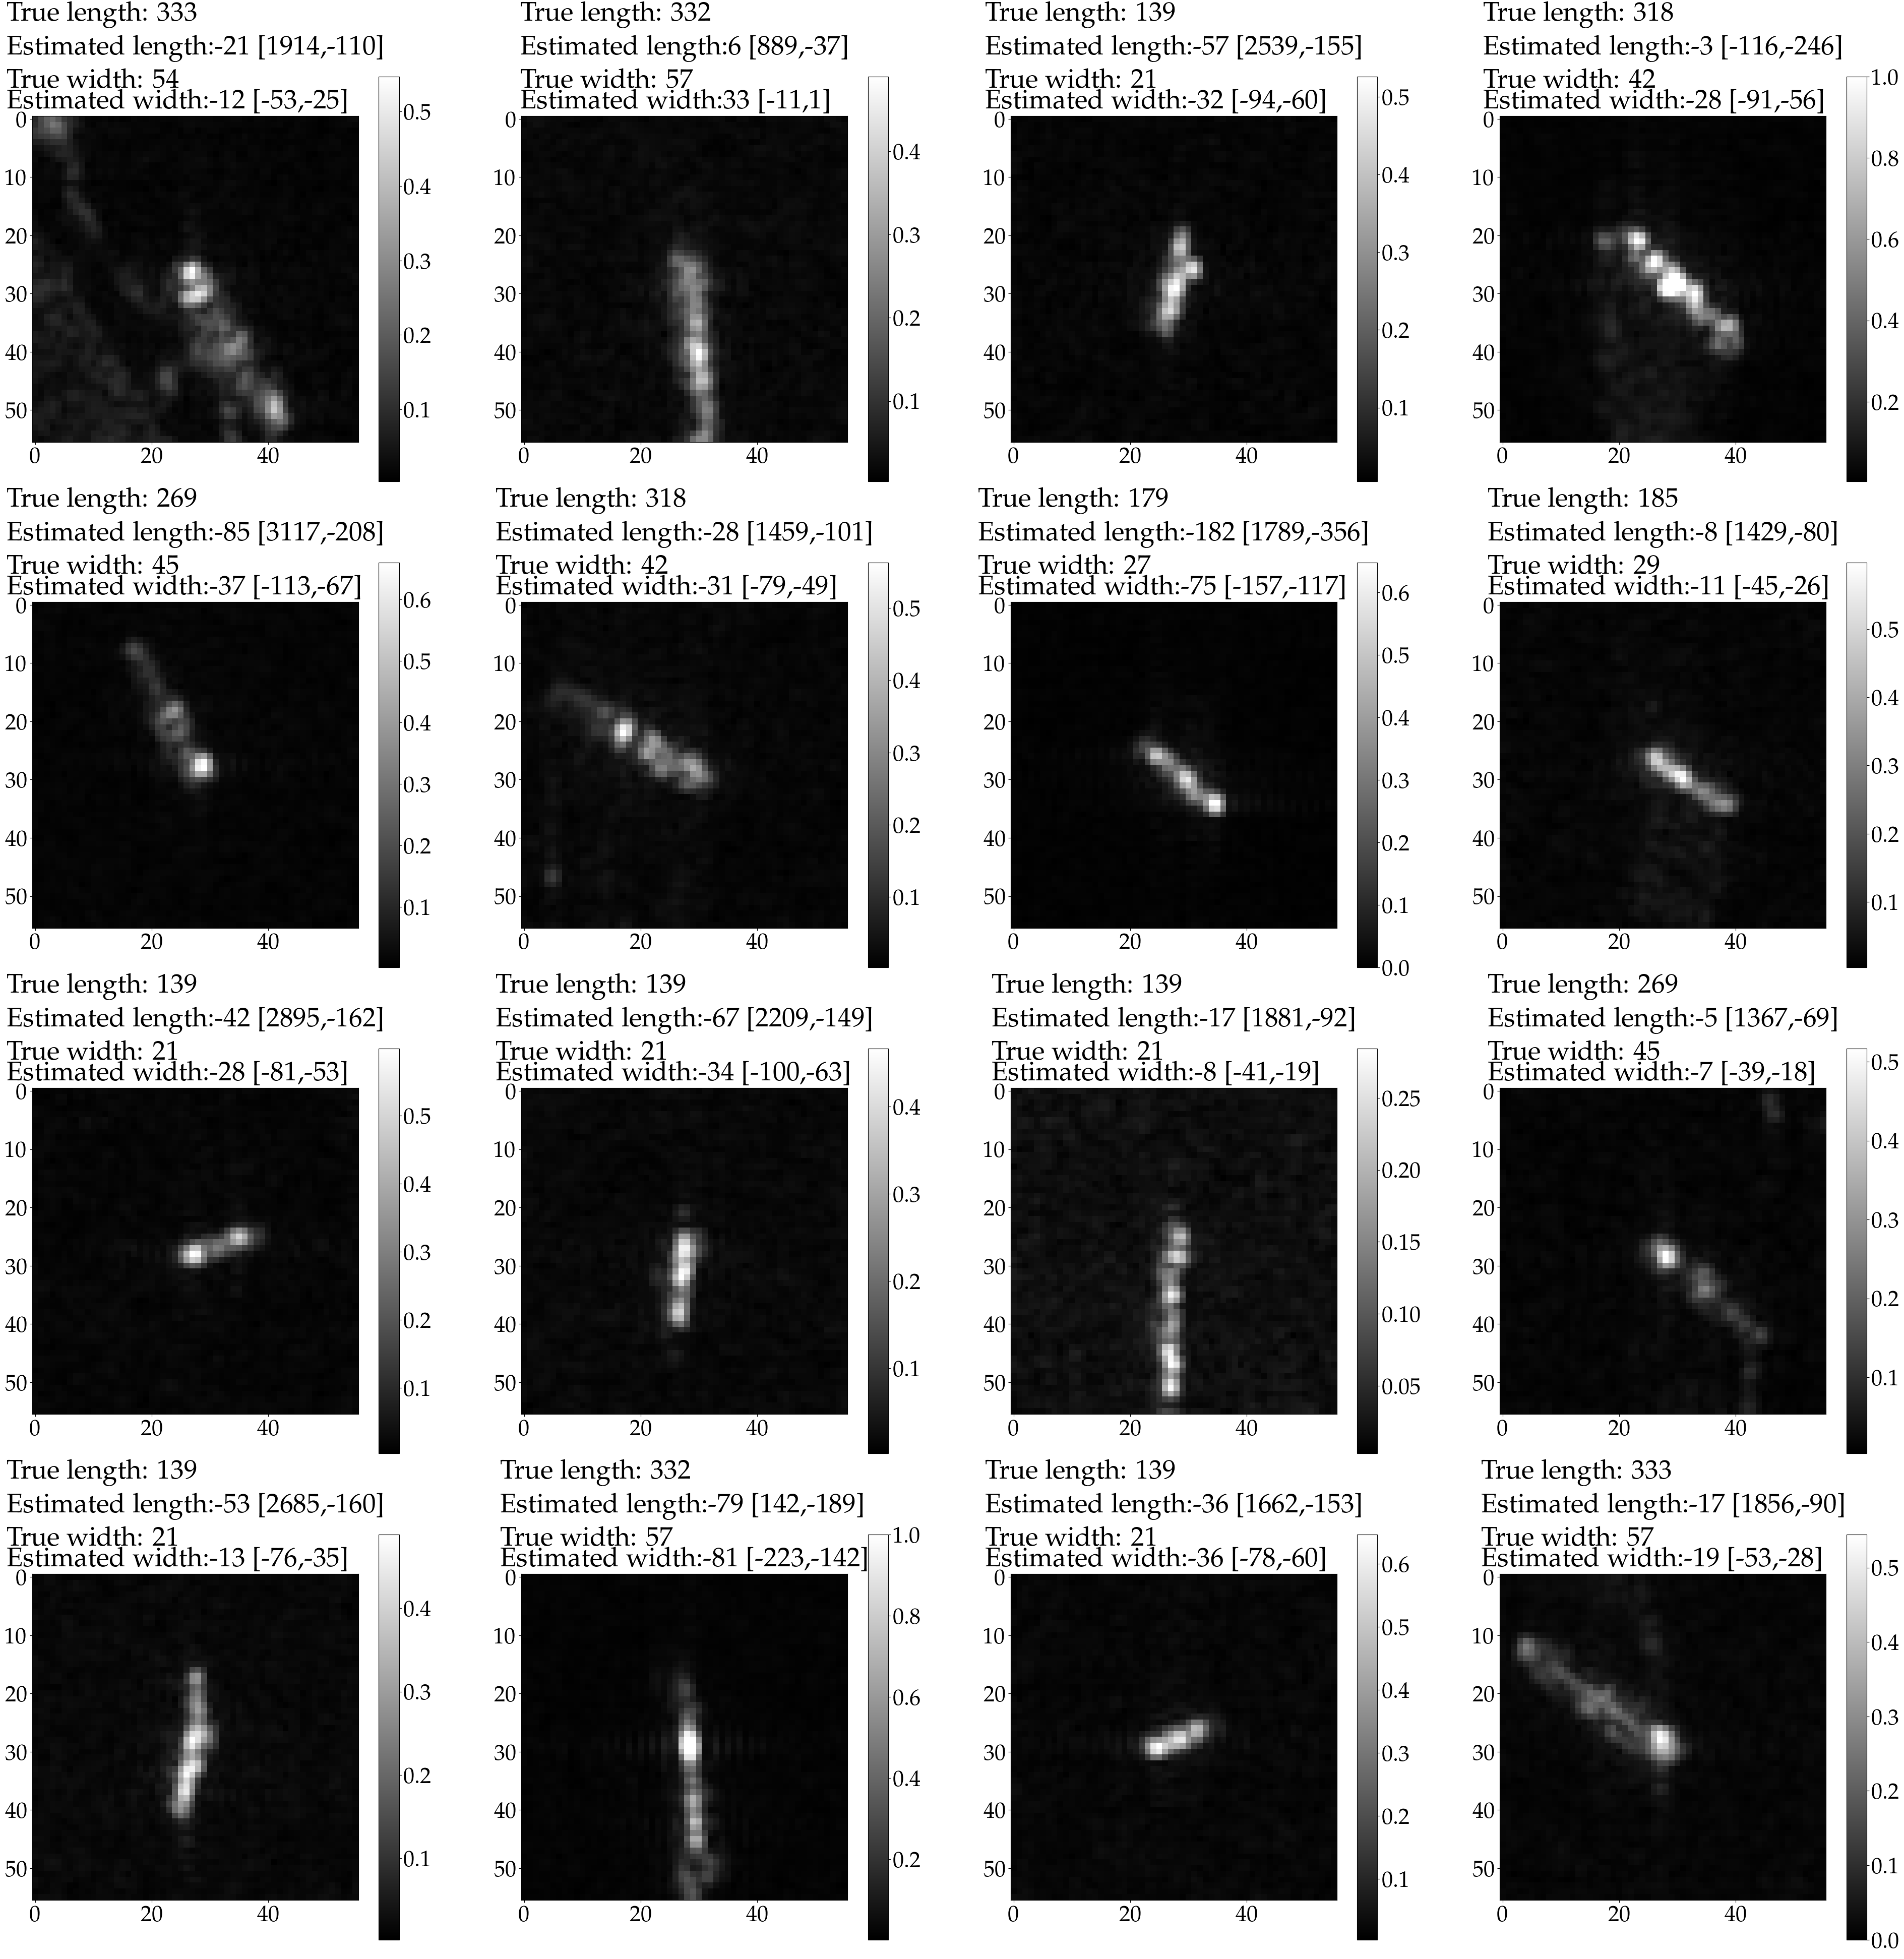

In [19]:
idx_same_ship = np.where(anal.mmsi==unique[mmsi_index[-5]])[0]

k = 1
plt.figure(figsize=(48,48))
for _ in range(16):
    plt.subplot(4,4,k)
    ix = idx_same_ship[k]
    plt.imshow(anal.images[ix,:, :, 1], cmap='gray')
    plt.colorbar()
    plt.title(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

    k = k+1


True length: 139     
Estimated length:-75 [2121,-161]            
True width: 21             
Estimated width:-44 [-100,-72]


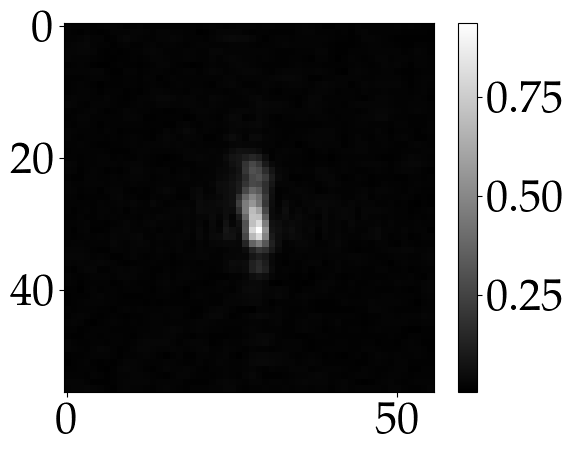

In [20]:
ix = idx_same_ship[0]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 333     
Estimated length:-21 [1914,-110]            
True width: 54             
Estimated width:-12 [-53,-25]


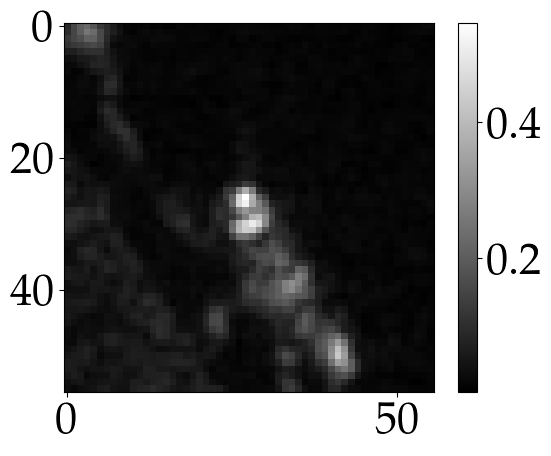

In [21]:
ix = idx_same_ship[1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 332     
Estimated length:6 [889,-37]            
True width: 57             
Estimated width:33 [-11,1]


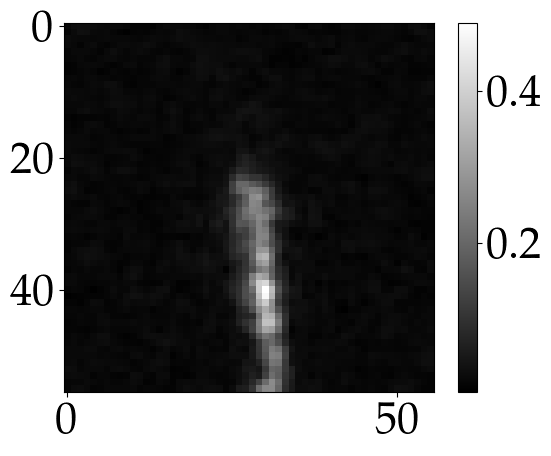

In [22]:
ix = idx_same_ship[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [23]:
anal.abs_errors()

In [29]:

abs_error_index = np.argsort(anal.length_errors_q50)

True length: 133     
Estimated length:-133 [2312,-226]            
True width: 19             
Estimated width:-64 [-151,-106]


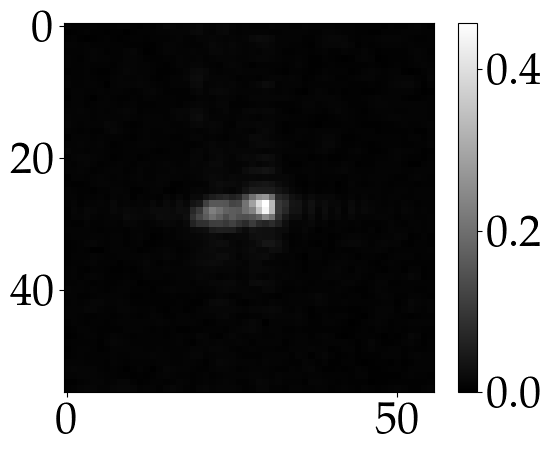

In [30]:
ix = abs_error_index[1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [31]:
both_error_index = np.argsort(anal.normalized_erros)

True length: 48     
Estimated length:-42 [1088,-78]            
True width: 11             
Estimated width:-11 [-42,-21]


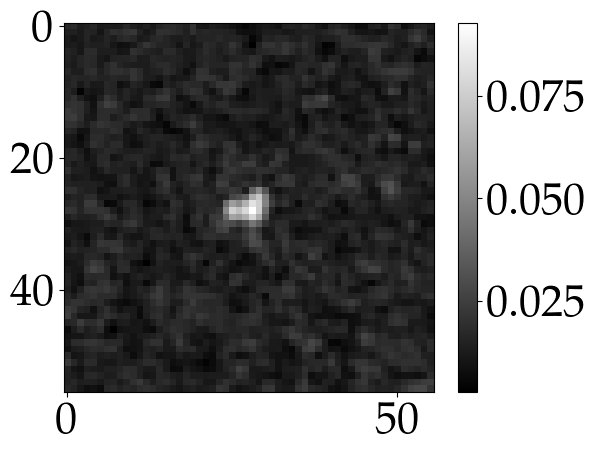

In [37]:
ix = both_error_index[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

../coding
